In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(480, 13)

In [8]:
# LABEL ENCODING
data.replace({'Loan_Status':{'Y':1, 'N':0}}, inplace=True)

/tmp/ipykernel_36/3392443147.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Loan_Status':{'Y':1, 'N':0}}, inplace=True)


In [9]:
data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [10]:
# REPLACING 3+ TO 4.
data.replace({'Dependents':{'3+':4}}, inplace=True)

<Axes: xlabel='Education', ylabel='count'>

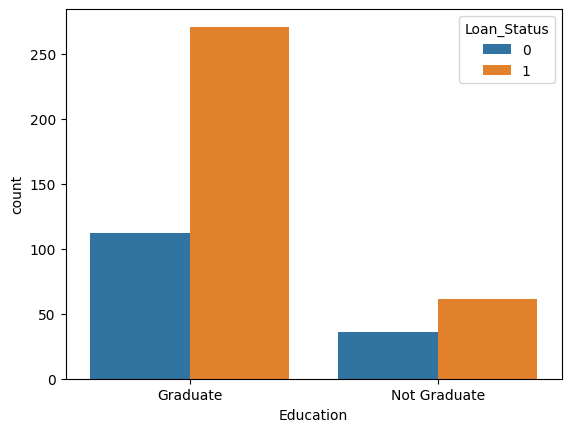

In [11]:
sns.countplot(x=data['Education'], hue=data['Loan_Status'])

In [12]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


<Axes: xlabel='Self_Employed', ylabel='count'>

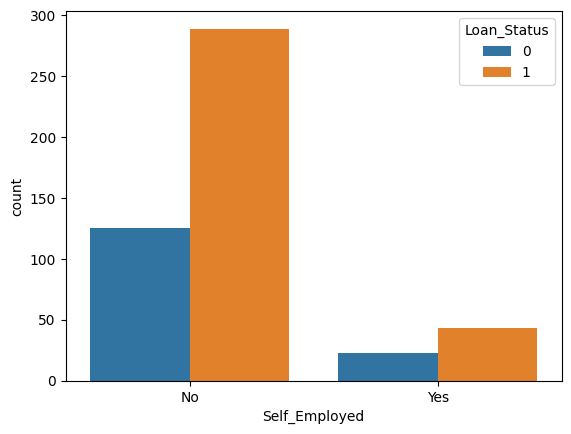

In [13]:
sns.countplot(x=data['Self_Employed'], hue=data['Loan_Status'])

<Axes: xlabel='Gender', ylabel='count'>

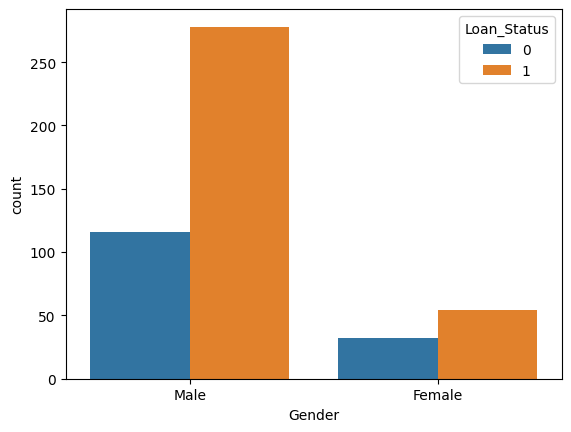

In [14]:
sns.countplot(x=data['Gender'], hue=data['Loan_Status'])

In [15]:
# replacing the categorical values with numerical ones.
data.replace({'Married':{'Yes': 1, 'No': 0}, 'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'Yes':1, 'No':0}, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)
data.head()

/tmp/ipykernel_36/178387131.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Married':{'Yes': 1, 'No': 0}, 'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'Yes':1, 'No':0}, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [16]:
#dropping Loan_ID column
data.drop(columns=['Loan_ID'], axis=1, inplace=True)

In [17]:
# seperating the data and label
X=data.drop(columns=['Loan_Status'], axis=1)
y=data['Loan_Status']

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [19]:
model=svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
# MODEL EVALUATION
X_train_pred=model.predict(X_train)
train_acc=accuracy_score(X_train_pred, y_train)
print("Training data accuracy:",train_acc)

Training data accuracy: 0.7986111111111112


In [40]:
# MODEL EVALUATION
X_test_pred=model.predict(X_test)
test_acc=accuracy_score(X_test_pred, y_test)
print("Test data accuracy:",test_acc)

Test data accuracy: 0.8333333333333334


In [45]:
input_data=[1,1,3,1,0,3036,2504,158,360,0,1]
input_data=np.asarray(input_data)
input_data_reshape=input_data.reshape(1,-1)

In [46]:
pred=model.predict(input_data_reshape)

if pred[0]==1:
    print("Loan is approved")
    
else:
    print("Loan is not approved")

Loan is not approved


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
